In [1]:
%load_ext autoreload
%autoreload 2

import scipy
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random
import sir_model
import json
from random import randint

In [ ]:

# initialize recording of parameter choices and true/false

param_choices_true_false = []

### Set these calibration parameters once:

In [3]:
# USER: set initial conditions
I0, R0 = 0.01, 0
S0 = 1-I0-R0

# USER: set simulation parameters
dt = 1
tstart = 0
tend = 100

# USER: set simulation parameters
dt = 1
tstart = 0
tend = 100


### After setting your calibration parameters, run the following cell as many times as you'd like to experiment with different parameter values:

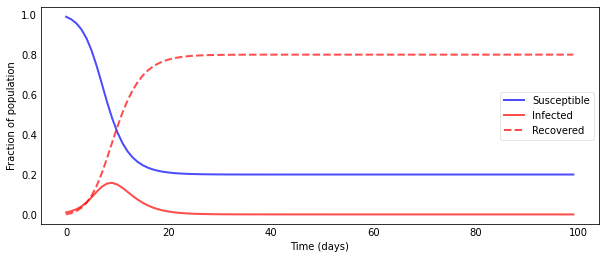

In [9]:

def ps(beta_val, gamma_val):
    def beta(t): return np.piecewise(t, [t>=0], [beta_val])
    def gamma(t): return np.piecewise(t, [t>=0], [gamma_val])

    y0 = S0, I0, R0 # Initial conditions vector

    tvect = np.arange(tstart, tend, dt)

    sim = odeint(sir_model.SIR_model, y0, tvect, args=(beta, gamma))
    S, I, R = sim.T

    # plot results
    sir_model.plotSIR(tvect, S, I, R)

    ## log parameters and sat/unsat

    param_assignments = {'beta': beta_val, 'gamma': gamma_val, 'assignment': input("Please enter 0 if the parameter choices were bad and 1 if they were good:")}

    param_choices_true_false.append(param_assignments)


beta_value = input("Please enter a value for beta:")
gamma_value = input("Please enter a value for gamma:")
ps(beta_value, gamma_value)


### At any point in the process, you can visualize the true/false points:

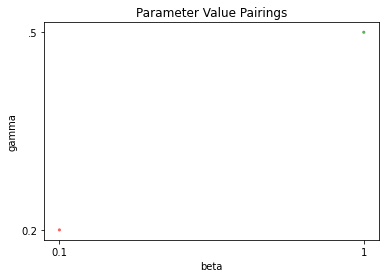

In [10]:
# Plot "true/false" points.  

sir_model.plot_two_params("beta", "gamma", param_choices_true_false)

### Once you're done, save your true/false points:

In [11]:
# Save results

id_number = randint(10**5, 10**6 - 1)

with open(f'sir_manual_{id_number}.json', 'w', encoding='utf-8') as f:
    json.dump(param_choices_true_false, f, ensure_ascii=False, indent=4)